In [1]:
import numpy as np
import PIL
import random
from PIL import Image
from PIL import ImageDraw
import pandas as pd
import copy

In [59]:
# Given a boolean array, create two images:Where True create two circle  One of a circle of radius n of color1, a second of radius n-1 of transparency
# Paste the image of the smaller transparent circles on top of the larger circle to create a rippling where the given points were
def ripple_outline_from_array(boolean_array, distance, width, color_1, color_2=(0,0,0,0)):
    circles_1 = Image.new("RGBA", (len(boolean_array[0]),len(boolean_array)), (0,0,0,0))
    #circles_2 = Image.new("RGBA", (len(boolean_array[0]),len(boolean_array)), (0,0,0,0))
    draw_circles_1 = ImageDraw.Draw(circles_1, "RGBA")
    #draw_circles_2 = ImageDraw.Draw(circles_2, "RGBA")
    for y in range(len(boolean_array)):
        for x in range(len(boolean_array[0])):
            if boolean_array[y][x] == True:
                draw_circles_1.ellipse((x-distance, y-distance, x+distance, y+distance), fill=color_1)
    for y in range(len(boolean_array)):
        for x in range(len(boolean_array[0])):
            if boolean_array[y][x] == True:
                draw_circles_1.ellipse((x-distance+width, y-distance+width, x+distance-width, y+distance-width), fill=color_2)
    #circles_1.paste(circles_2, (0,0))
    return circles_1

In [73]:
#Test
image = Image.open("sheeran.png")
data = np.asarray(image)
array = np.array([ [(j == [211,211,211]).all() for j in i] for i in data])
array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

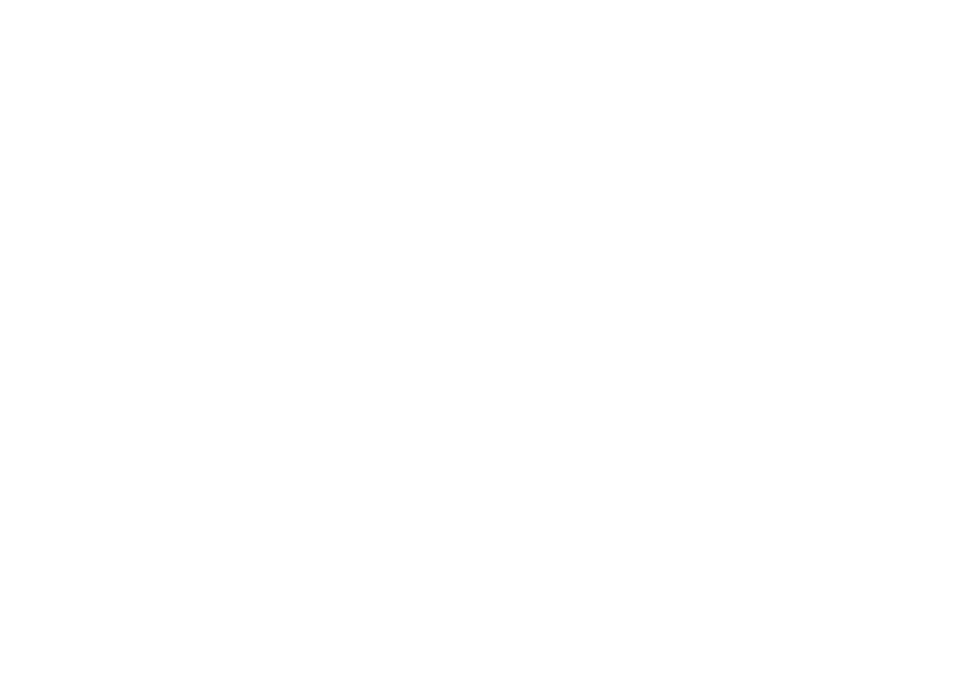

In [74]:
ripples = ripple_outline_from_array(array, distance = 25, width = 5, color_1=(255,255,255,255), color_2 = (0,0,0,0))
ripples

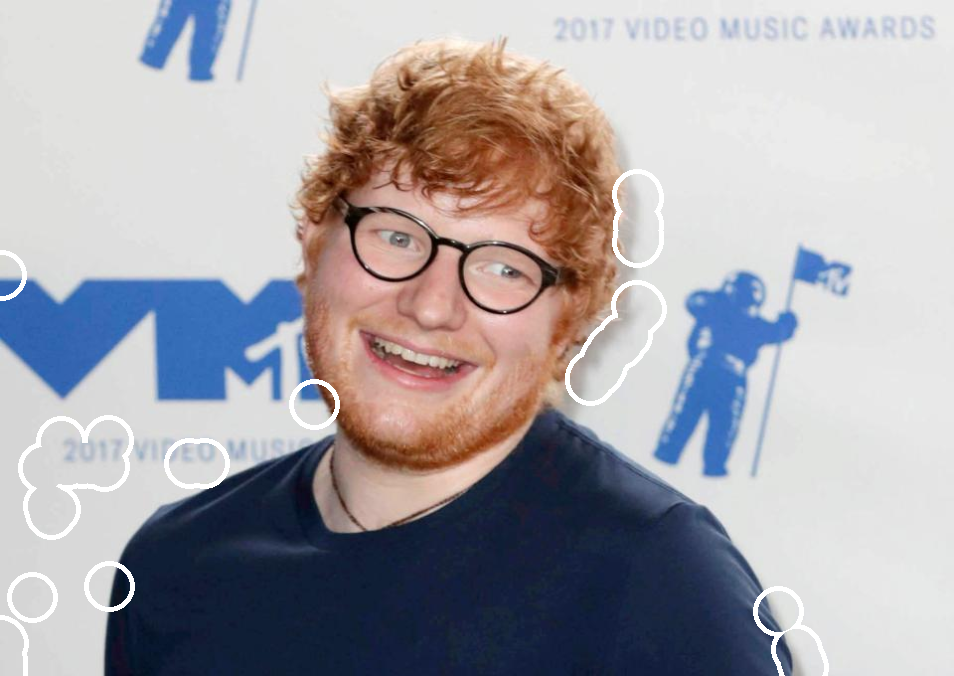

In [75]:
image.paste(ripples, (0,0), ripples)
image

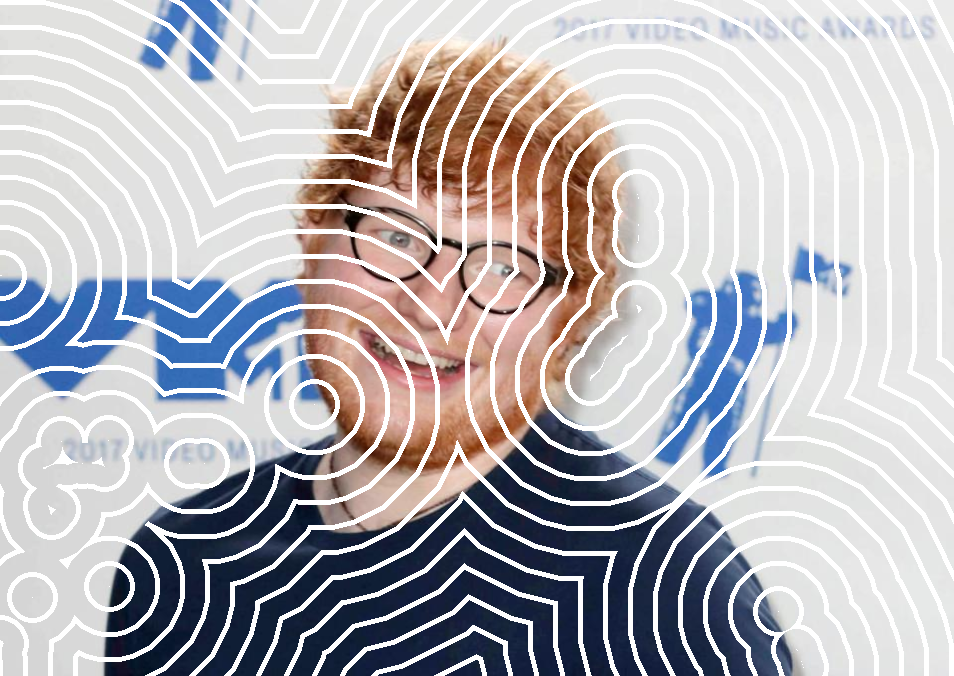

In [91]:
#Repeatedly hitting it yields some waveys
data = np.asarray(image)
array = np.array([ [(j == [255,255,255]).all() for j in i] for i in data])
ripples = ripple_outline_from_array(array, distance = 25, width = 5, color_1=(255,255,255,255), color_2 = (0,0,0,0))
image.paste(ripples, (0,0), ripples)
image

In [98]:
def ripple_from_color(image, color, distance, width):
    color_1 = (255,255,255,255)
    color_2=(0,0,0,0)
    circles_1 = Image.new("RGBA", (image.size[0], image.size[1]), (0,0,0,0))
    
    draw_circles_1 = ImageDraw.Draw(circles_1, "RGBA")
    
    data = np.asarray(image)
    array = np.array([ [(j == [color[0],color[1], color[2]]).all() for j in i] for i in data])
    
    for y in range(len(array)):
        for x in range(len(array[0])):
            if array[y][x] == True:
                draw_circles_1.ellipse((x-distance, y-distance, x+distance, y+distance), fill=color_1)
    for y in range(len(array)):
        for x in range(len(array[0])):
            if array[y][x] == True:
                draw_circles_1.ellipse((x-distance+width, y-distance+width, x+distance-width, y+distance-width), fill=color_2)
    ripple_color = Image.new("RGB", (image.size[0], image.size[1]), color)
    image.paste(ripple_color, (0,0), circles_1)
    return image

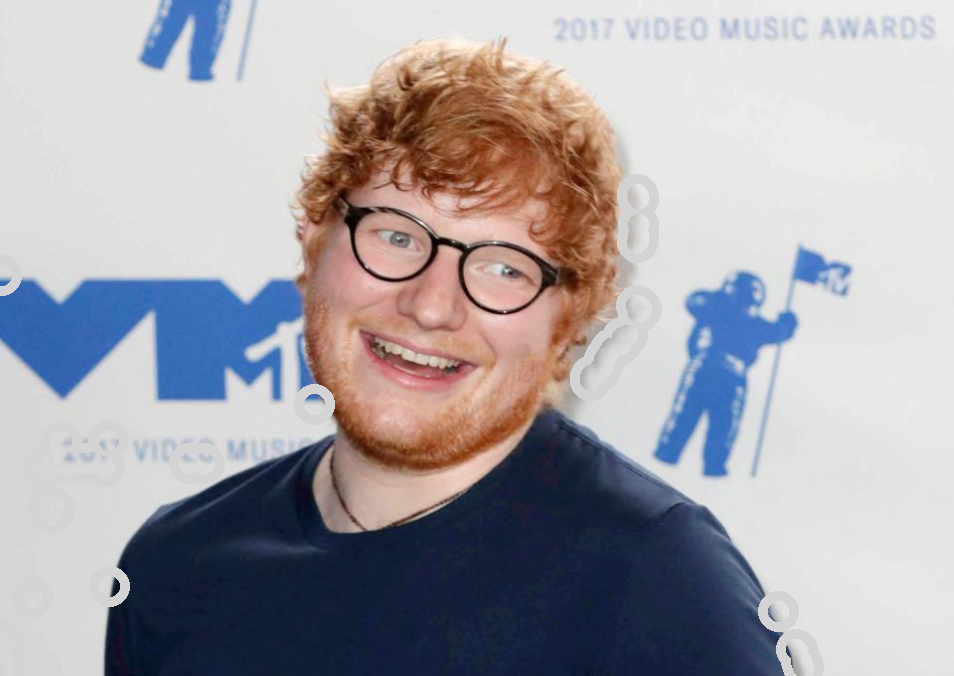

In [99]:
image = Image.open("sheeran.png")
ripple_from_color(image, (211,211,211), 20, 10)